# Predicting 2nd Half Strikeout Percentage with Python


I will be using a linear regression model to predict second-half strikeout percentages for the given data. 

The first step, as always, is to import the necessary modules.

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import seaborn as sns
%matplotlib inline

## Investigating the Data
First, I investigated the data visually and analytically, looking for important factors that may help predict K% in the second half and could be used as input variables in a linear regression model. 

The following section is mostly plots, nothing groundbreaking.

In [3]:
#Load the data
data = pd.read_csv('strikeouts.csv')
#Convert to a dataframe for easier data science manipulation 
df = pd.DataFrame(data)

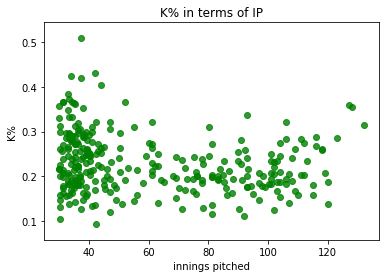

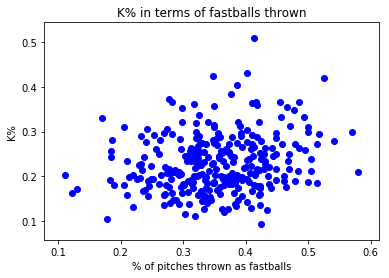

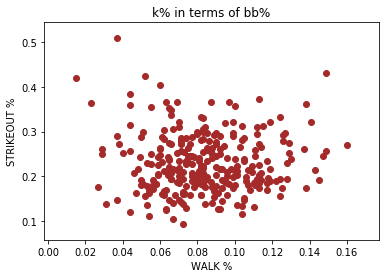

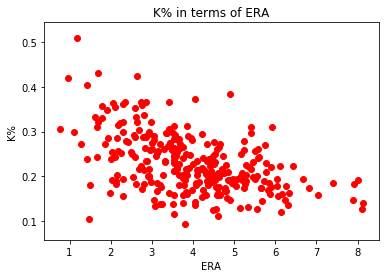

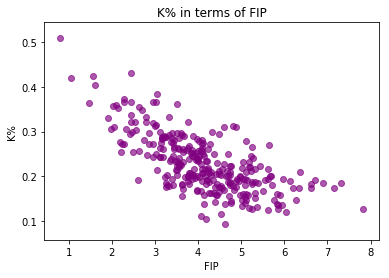

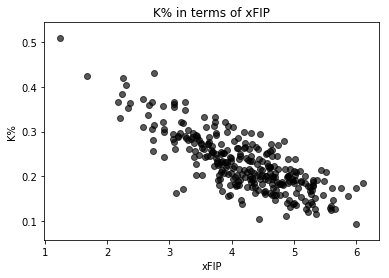

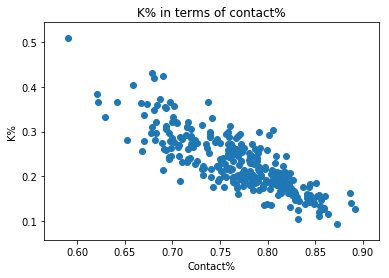

In [243]:
#Plot some interesting correlations
#perhaps not the most "efficient" way of doing things, but it works for me

#plot K% as a function of innings pitched
plt.scatter(df['IP'], df['K%'], alpha = 0.8, color='g')
plt.xlabel("innings pitched")
plt.ylabel("K%")
plt.title("K% in terms of IP")
plt.show()

#Plot K% as a function of FB%
plt.scatter(df["FB%"], df["K%"], color='b')
plt.xlabel("% of pitches thrown as fastballs")
plt.ylabel("K%")
plt.title("K% in terms of fastballs thrown")
plt.show()

#plot K% as a function of BB%
plt.scatter(df["BB%"], df["K%"], color='brown')
plt.xlabel("WALK %")
plt.ylabel("STRIKEOUT %")
plt.title("k% in terms of bb%")
plt.show()

#plot K% as a function of ERA
plt.scatter(df["ERA"], df["K%"], color='r')
plt.xlabel("ERA")
plt.ylabel("K%")
plt.title("K% in terms of ERA")
plt.show()

#plot K% as a function of FIP
plt.scatter(df['FIP'], df["K%"], color='purple', alpha = 0.65)
plt.xlabel("FIP")
plt.ylabel("K%")
plt.title("K% in terms of FIP")
plt.show()

#Plot K% as a function of xFIP
plt.scatter(df['xFIP'], df['K%'], color='black', alpha = 0.65)
plt.xlabel("xFIP")
plt.ylabel("K%")
plt.title("K% in terms of xFIP")
plt.show()

#Plot K% as a function of contact% 
plt.scatter(df['Contact%'], df['K%'])
plt.xlabel("Contact%")
plt.ylabel("K%")
plt.title("K% in terms of contact%")
plt.show()

There are some interesting correlations in the data above. A more concrete way to explore these is by plotting the correlations with the ".corr()" method. In the following table, terms with a value closer to 1 or -1 imply a stronger correlation.

In [244]:
df.corr()

,fangraphs_id,G,IP,ERA,FIP,xFIP,AVG,K%,BB%,Swing%,Contact%,GB%,LD%,FB%,2ndHalfK%,2ndHalfIP
fangraphs_id,1.000000,-0.155230,-0.061216,-0.008793,0.011688,0.011063,-0.000931,-0.041856,-0.001560,-0.070065,-0.004634,0.082422,-0.061773,-0.057058,-0.015705,0.052360
G,-0.155230,1.000000,-0.548951,-0.378079,-0.454453,-0.349884,-0.383951,0.395293,0.080502,0.263650,-0.411401,0.075822,-0.128246,-0.022522,0.267638,-0.615038
IP,-0.061216,-0.548951,1.000000,0.126342,0.127377,0.069570,0.206906,-0.192697,-0.192724,-0.093096,0.223163,0.021909,0.105083,-0.065693,-0.110999,0.706900
ERA,-0.008793,-0.378079,0.126342,1.000000,0.710446,0.534888,0.784181,-0.489450,0.172259,-0.222910,0.421376,-0.130562,0.265230,0.020024,-0.354349,0.123542
FIP,0.011688,-0.454453,0.127377,0.710446,1.000000,0.799553,0.593626,-0.697386,0.261422,-0.272719,0.554805,-0.167731,0.049053,0.147816,-0.471818,0.111348
xFIP,0.011063,-0.349884,0.069570,0.534888,0.799553,1.000000,0.494795,-0.795221,0.364574,-0.226579,0.602275,-0.312069,-0.021269,0.322228,-0.493740,0.109172
AVG,-0.000931,-0.383951,0.206906,0.784181,0.593626,0.494795,1.000000,-0.657340,-0.059969,-0.076086,0.598514,0.031587,0.392436,-0.196098,-0.477802,0.216977
K%,-0.041856,0.395293,-0.192697,-0.489450,-0.697386,-0.795221,-0.657340,1.000000,-0.014532,0.171636,-0.821083,-0.161959,-0.082538,0.197842,0.674102,-0.192820
BB%,-0.001560,0.080502,-0.192724,0.172259,0.261422,0.364574,-0.059969,-0.014532,1.000000,-0.495871,-0.118644,-0.021127,-0.042071,0.038440,0.067464,-0.113075
Swing%,-0.070065,0.263650,-0.093096,-0.222910,-0.272719,-0.226579,-0.076086,0.171636,-0.495871,1.000000,-0.171653,-0.201882,-0.035431,0.218099,0.148794,-0.146663


## Creating a Linear Regression Model
I'll be using values from the above table with an absolute value of above 0.5 in the "K%" column. Only four occured: Contact%, FIP, xFIP, and AVG. Intuitively, these make sense, as each relates to a strikeout in some way. Now, we'll see if they make sense analytically.

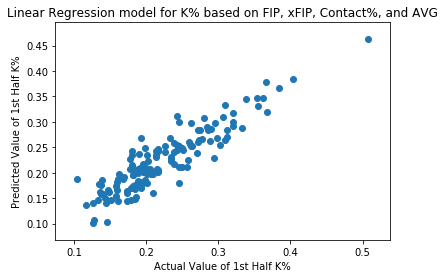

In [246]:
#Independent variables go in X, dependent variable in Y
X = df[['Contact%', 'FIP', 'xFIP', 'AVG']]
Y = df['K%']

#Train the model by creating training and test variables
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5, shuffle='false')

#make regression variable
lm = LinearRegression()

#train model
fit = lm.fit(X_train, Y_train)

#use model to predict Y values based on x 
model = lm.predict(X_test)

#A plot of the data points
plt.scatter(Y_test,model)
plt.xlabel("Actual Value of 1st Half K%")
plt.ylabel("Predicted Value of 1st Half K%")
plt.title("Linear Regression model for K% based on FIP, xFIP, Contact%, and AVG")
plt.show()


In [152]:
#But how accurate is it? Testing with various error methods. 

r2 = lm.score(X_test,Y_test)
print("The r-squared value is %.4f" %r2)

mse = mean_squared_error(Y_train, Y_test)
rmse = np.sqrt(mse)
print("The root mean squared error value is %.4f" %rmse)

mae = mean_absolute_error(Y_train, Y_test)
print("The mean absolute error value is %.4f" %mae)


The r-squared value is 0.8234
The root mean squared error value is 0.0937
The mean absolute error value is 0.0741


## Refining the Model
So we have a good model for predicting K% based on four important factors -- it predicts strikeouts within 82%.
However, the model can be refined by using cross validation. In this case, I'll use Leave One Out cross validation.  

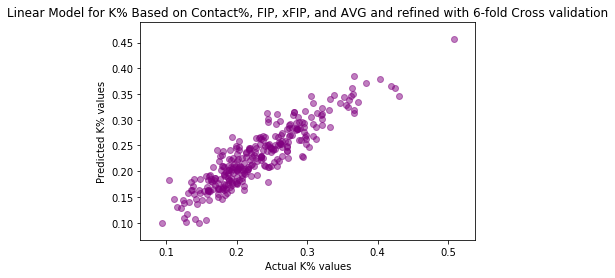

The r-squared value for this refined model is: 0.8276
The root mean squared error for this refined model is: 0.0269
The mean absolute error for this refined model is: 0.02103


In [253]:
# 6-fold Leave One Out cross validation
scores = cross_val_score(fit, X, df["K%"], cv=6)
predict = cross_val_predict(fit, X, df["K%"], cv=6)
plt.scatter(df["K%"], predict, alpha=0.5, color='purple')
plt.xlabel("Actual K% values")
plt.ylabel("Predicted K% values")
plt.title("Linear Model for K% Based on Contact%, FIP, xFIP, and AVG and refined with 6-fold Cross validation")
plt.show()

#Again, check the accuracy
confidence = r2_score(df["K%"], predict)
print("The r-squared value for this refined model is: %.4f" %confidence)

mse2 = mean_squared_error(df["K%"], predict)
rmse2 = np.sqrt(mse2)
print("The root mean squared error for this refined model is: %.4f" %rmse2)

mae2 = mean_absolute_error(df["K%"], predict)
print("The mean absolute error for this refined model is: %.5f" %mae2)

From the above numbers, we can see that this model is more accurate than the previous one, so it is the one I chose to use going forward. 

## Results

Now that the refined model is complete and ready to go, it's time to see how its predictions stand up to the results. 
First, I'll plot the model's predictions against the actual 2nd Half K%.

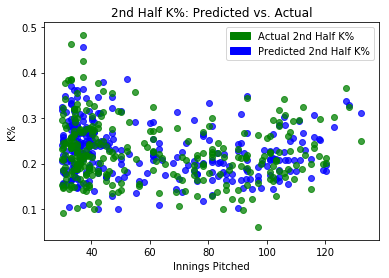

In [224]:
plt.scatter(df["IP"], predict, color = 'b', alpha=0.75)
plt.scatter(df["IP"], df["2ndHalfK%"], color='g', alpha=0.75)
plt.xlabel("Innings Pitched")
plt.ylabel("K%")
plt.title("2nd Half K%: Predicted vs. Actual")
green_patch = mpatches.Patch(color = 'green', label='Actual 2nd Half K%')
blue_patch = mpatches.Patch(color = 'blue', label = 'Predicted 2nd Half K%')
plt.legend(handles=[green_patch, blue_patch])
plt.show()

So it's not a perfect fit, but it matches up relatively nicely. It seems to fail more often for higher K%. 
Let's take a look at a residual plot.

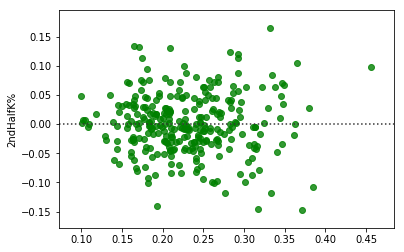

In [231]:
#residual plot
sns.residplot(predict, df["2ndHalfK%"], color='green')
plt.show()

There are some visible outliers, as seen in the other plot. However, the overall random distribution of points around the horizontal axis implies that a linear fit was effective for this data.

I feel it is salient to examine the actual numbers and get a sense of how accurate they were. 

In [233]:
#Print each number and compare
print(df["2ndHalfK%"])
print(predict)

0      0.249
1      0.324
2      0.366
3      0.303
4      0.212
5      0.201
6      0.200
7      0.297
8      0.216
9      0.244
10     0.234
11     0.144
12     0.200
13     0.218
14     0.325
15     0.188
16     0.232
17     0.295
18     0.196
19     0.166
20     0.294
21     0.228
22     0.269
23     0.260
24     0.188
25     0.306
26     0.171
27     0.341
28     0.179
29     0.292
       ...  
266    0.240
267    0.178
268    0.149
269    0.252
270    0.145
271    0.383
272    0.153
273    0.279
274    0.247
275    0.178
276    0.167
277    0.192
278    0.377
279    0.285
280    0.219
281    0.242
282    0.343
283    0.235
284    0.149
285    0.146
286    0.310
287    0.246
288    0.092
289    0.322
290    0.209
291    0.186
292    0.295
293    0.210
294    0.152
295    0.231
Name: 2ndHalfK%, Length: 296, dtype: float64
[0.31223179 0.32891778 0.33786979 0.2805972  0.18399309 0.19698726
 0.18588666 0.25171251 0.25336624 0.3060321  0.25814716 0.20981121
 0.16852836 0.23046096 0.268

The above method is cumbersome. I decided to get a sense for how far off my numbers were for each data point using the percent error.


In [252]:
#Calculating percent error
percent_error = abs((df["2ndHalfK%"]-predict)/(df["2ndHalfK%"]))*100
#Now grab the average percent error -- to account for all 296 data points. 
print(np.mean(percent_error))


21.204000924


So, on average, my numbers were 21.2 percent off of the actual numbers. This matches up approximately with the RMSE and MAE from the refined model. 

## Citing My Sources

In [256]:
'''
I used many resources to help compile my data and perform my analysis. The links are as follows: 

Residual plot: https://seaborn.pydata.org/generated/seaborn.residplot.html

Generating Linear Regression Models: 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Cross-validating:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

Pandas Library:
https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673


'''

'\nI used many resources to help compile my data and perform my analysis. The links are as follows: \n\nResidual plot: https://seaborn.pydata.org/generated/seaborn.residplot.html\n\nGenerating Linear Regression Models: \n\nhttps://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html\n\nhttps://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict\n\nhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html\n\nhttps://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6\n\nhttps://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9\n\nCross-validating:\n\nhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html\n\nhttps://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6\n\nPandas Library:\n\nhttps://towardsdatascience.com/a-quick-introduction-to